Copyright @ 2021 ABCOM Information Systems Pvt. Ltd. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and limitations under the License.


# Insurance Price Claim Prediction

Studying the risk underwriting in Health Insurance, interplay of various attributes of the insured and how they affect the insurance premium

## Algorithm: Gradient Boasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor # regression using Gradient boasting
from sklearn.preprocessing import LabelEncoder# for label encoding 
warnings.filterwarnings("ignore")

## Fetching Data


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/abcom-mltutorials/Datasets_general/main/insurance.csv")#reading dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Attributes

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance

## Data Preproccessing

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking category values

In [5]:
print("Unique classes in Sex : ",df['sex'].unique()) #getting unique values in sex column
print("Unique classes in smoker : ",df['smoker'].unique())#getting unique values in smoker column
print("Unique classes in region : ",df['region'].unique())#getting unique values in region column

Unique classes in Sex :  ['female' 'male']
Unique classes in smoker :  ['yes' 'no']
Unique classes in region :  ['southwest' 'southeast' 'northwest' 'northeast']


Use LabelEncoder for encoding categorical columns

In [6]:
labelencoder = LabelEncoder()# initializing encoder
df['sex']=labelencoder.fit_transform(df['sex']) #male =0
df['smoker']=labelencoder.fit_transform(df['smoker']) #yes= 0
df['region']=labelencoder.fit_transform(df['region']) # northwest =1,southE=2,southW=3,NE=0

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


After LabelEncoding this are the following changes:

1. sex :  male -> 1,female ->0
2. smoker : yes-> 1,no->0
3. region : Northeast ->0,Northwest ->1,southeast ->2,southwest ->3,

## EDA

Let's perform  EDA to understand the dataset much better.
we will plot a scatter plot for age against the charges with respect to the smoker feature.

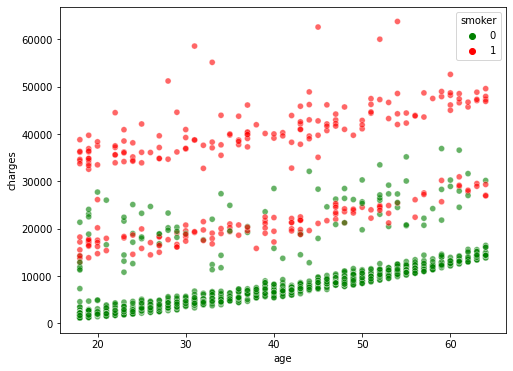

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['green','red'] ,alpha=0.6)
plt.show()

## Feature selection

In [9]:
X=df.drop("charges",axis=1)#dropping target column from dataset 
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## Target column

In [10]:
y=df.charges

## Splitting Dataset

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
print("train: ",x_train.shape)
print("test: ",x_test.shape)

train:  (1070, 6)
test:  (268, 6)


## Model

For our project we will use GradientBoastRegressor to perform regression using Ensemble learning

Parameter Details:


* N_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
* Loss: Loss function to be optimized.
* Learning_rate: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
* Criterion: The function to measure the quality of a split. 
* Max_depth: Maximum depth of the individual regression estimators.
* Max_features: The number of features to consider when looking for the best split
* Tol: Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations


In [12]:
model=GradientBoostingRegressor(n_estimators=433,
                                loss='huber',
                                learning_rate=0.056767559947689034,
                                criterion='mse',
                                max_depth=3,
                                max_features='auto',
                                tol=0.001,
                                n_iter_no_change=10,
                                verbose=1,
                                random_state=123)
model.fit(x_train,y_train)#fitting model for training

      Iter       Train Loss   Remaining Time 
         1    67129019.3385            1.52s
         2    60795096.0720            1.50s
         3    55232530.2114            1.46s
         4    50116367.1127            1.43s
         5    45871085.6898            1.41s
         6    42096773.6774            1.40s
         7    38680203.7393            1.38s
         8    35485765.5366            1.40s
         9    32826190.9365            1.39s
        10    30371222.1133            1.39s
        20    15669210.9697            1.40s
        30    10165185.9473            1.28s
        40     7217506.0258            1.24s
        50     5144326.2085            1.18s
        60     3840471.2572            1.15s
        70     3050637.3981            1.12s
        80     2722645.5139            1.07s
        90     2354577.1093            1.02s
       100     2188666.1330            0.98s
       200     1726384.0254            0.64s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.056767559947689034, loss='huber',
                          max_depth=3, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=433,
                          n_iter_no_change=10, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

### Accuracy

In [13]:
print("accuracy test: {:.2f}%".format(model.score(x_test,y_test)*100))#getting accuracy on test set

accuracy test: 91.09%


### Predictions

Another way of evaluation is by making a prediction on the test dataset and comparing the actual test values to the predicted values.

In [14]:
y_pred=model.predict(x_test)#predicting on test set
print("r2_score on test set : {:.2f} %".format(r2_score(y_test,y_pred)))# getting r2 score for actual vs predicted values

r2_score on test set : 0.91 %


### Features importance plot

(-1.0, 6.0)

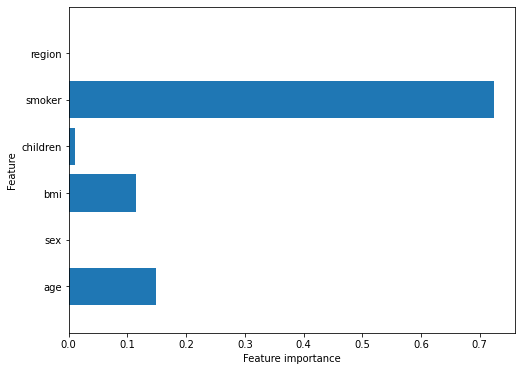

In [15]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)


From the plot, Since this dataset is for health insurance, we can say that the feature smoker has the highest impact on prediction. Followed by other features like age and BMI has the impact while features like sex and region have the least impact on model predict in this case.
.

## Prediction on unseen data

we will test model on following case :

A customer is an 18-year-old male and has a BMI of 25.002.
he doesn't smoke and stays in the northeast region.
let's see what amount our model predict for this case.and Let see what our model predict if the same benficiary was a smoker

In [16]:
data = {'age': [18, 18], 'sex': [1, 1],'bmi':[25.002,25.002],'children':[0,0],'smoker':[0,1],'region':[0,0]}
my_test_data=pd.DataFrame(data=data)

In [17]:
my_test_data

,age,sex,bmi,children,smoker,region
0,18,1,25.002,0,0,0
1,18,1,25.002,0,1,0


In [18]:
result=model.predict(my_test_data)
print("output : ",result)#getting prediction for the test value

output :  [ 5566.69343641 19936.14511967]
